**Prediction using Supervised ML :
 Task-1**

***Predict the percentage of an student based on the no. of study hours.***

In [1]:
#importing all the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load Dataset

data=pd.read_csv('http://bit.ly/w-data')

In [4]:
#display data

data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [127]:
#Assign the hours values to x & scores values to y:

x=data['Hours'].values
y=data['Scores'].values

In [128]:
#display the values of x ang y:

x,y

(array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
        3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

In [54]:
#Details of dataset

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


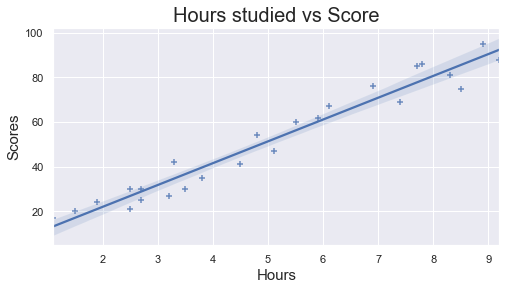

In [130]:
#show the Regression line corresponding to whole Dataset

plt.figure(figsize=(8,4))
sns.set(style='darkgrid')
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score', fontsize=20)
sns.regplot(data=data,x='Hours',y='Scores',color='b',marker='+')
plt.show()

***NOW, WE BUILD THE MODEL LINEAR REGRESSION***

In [62]:
# importing required libraries 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# splitting the data into train and test sets.

X_train,X_test,Y_train,Y_test = train_test_split(x,y,random_state = 0,test_size=0.2)


In [67]:
#display the values of tran and test sets

X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((20,), (5,), (20,), (5,))

In [68]:
#Assign the Linearegression to reg 

reg=LinearRegression()

In [93]:
#We need to reshape the x values because we can't use rank-1 matrix in scikit learn

x=x.reshape(n,1)
X_train=X_train.reshape(20,1)
X_test=X_test.reshape(5,1)


In [78]:
#Fitting the training data

reg.fit(X_train,Y_train)

LinearRegression()

In [80]:
#Assign the intercept value to c and slope value to m:

c=reg.intercept_
m=reg.coef_

In [84]:
#Print the values of intercept and slope:

print("intercept of line is" ,+c, "and slope of line is",+m)

intercept of line is 2.018160041434683 and slope of line is [9.91065648]


In [133]:
#print the values of y corresponding to x_train data:

yp=m*X_train+c
yp


array([[39.67865467],
       [20.84840735],
       [79.32128059],
       [70.40168976],
       [12.91988217],
       [52.56250809],
       [78.33021494],
       [34.72332643],
       [84.27660883],
       [93.19619966],
       [62.47316457],
       [36.70545772],
       [28.77693254],
       [56.52677068],
       [28.77693254],
       [86.25874013],
       [26.79480124],
       [49.58931115],
       [90.22300272],
       [46.6161142 ]])

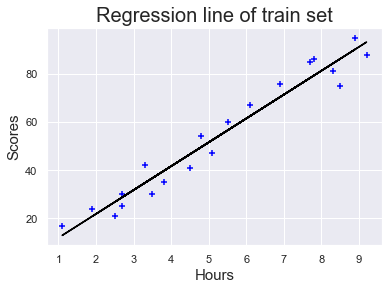

In [100]:
#plotting the regression line corresponding to trained data:

plt.scatter(X_train,Y_train,color='blue',marker='+')
plt.plot(X_train,yp,color='black')
plt.xlabel("Hours",fontsize=15,)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line of train set",fontsize=20)
plt.show()

In [94]:
#final goal:- we need to predict the vales of y(scores) corresponding to x_test:

Y_pred=reg.predict(X_test)
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [96]:
#Display the values of predicted y(Y_pred) and actual y(Y_test):

Y_pred,Y_test.values

(array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328]),
 array([20, 27, 69, 30, 62], dtype=int64))

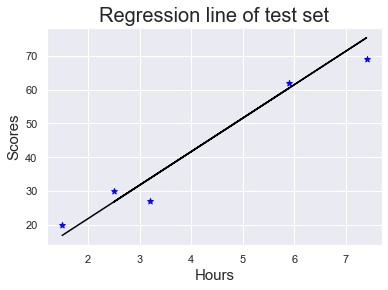

In [137]:
#Plot the regression line corresponding to test set of x & predicted values of y:

plt.plot(X_test,Y_pred,color='black')
plt.scatter(X_test,Y_test,color='blue',marker='*')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line of test set",fontsize=20)
plt.show()

In [113]:
#compare the actual value and predicted values of y:

data_compare=pd.DataFrame({'Actual_values':list(Y_test),'Predicted_values':Y_pred})

In [114]:
#display the compared data:

data_compare

,Actual_values,Predicted_values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [119]:
#import required library:

from sklearn import metrics

#calculate R square value to predict the best fit or Accuracy of model:

Accuracy=metrics.r2_score(Y_test,Y_pred)
print("Accuracy of model is : "+str(Accuracy*100))

Accuracy of model is : 94.54906892105356


***Accuracy is 94.5% that means our model is good model***

In [120]:
#To calculate the error, import required library:
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [138]:
#calculate mean square error:

MSE = metrics.mean_squared_error(Y_test,Y_pred)

#calculate the square root of mean square error:

root_MSE = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
Abs_MSE = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_MSE)
print("Root Mean Squared Error = ",root_MSE)


Mean Squared Error      =  21.5987693072174
Root Mean Squared Error =  4.6474476121003665
Root Mean Squared Error =  4.6474476121003665


In [122]:
Y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

**As our another goal is to find the predicted score if student studies 9.25 hours per day**

In [123]:
Predicted_score = reg.predict([[9.25]])


In [124]:
print("If a student studies for 9.25 hrs/ day then there predicted score will be : " , Predicted_score)

If a student studies for 9.25 hrs/ day then there predicted score will be :  [93.69173249]


***CONCLUSION:
From the above result we can say if a student studied for 9.25 hours then student will secured 93.69 MARKS.***

 ***Task 1 completed***